In [1]:
import glob
import json
import pathlib
import string
import numpy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
STOP_WORDS = set(stopwords.words("english"))
for w in ['', 'would', 'could', 'use', 'also', 'another', 'must', 'shall',
          'said', 'among', 'much', 'made', 'fact', "“", "”", "’"]:
    STOP_WORDS.add(w)

TABLE_PUNCT = str.maketrans("", "", string.punctuation)

def get_words(text):

    # Remove dots
    text = text.replace("·", " ")
    text = text.replace("•", " ")

    # split into words
    tokens = word_tokenize(text)

    words = []
    for i, w in enumerate(tokens):

        if "(" in w or ")" in w or ":" in w:
             words.append(w)

        else:
            # convert to lower case and remove punctuations
            w = w.lower().translate(TABLE_PUNCT)

            # Remove short words and stop words
            if len(w) > 2 and w not in STOP_WORDS:

                # Keep 1 digit long and 4 digits long numbers.
                if any(v.isdigit() for v in w):
                    if len(w) == 1 or len(w) == 4:
                    #if re.match(r'([1-3][0-9]{3})', w) is not None:
                        words.append(w)

                # Keep the words made entirely of alphabetic characters
                elif w.isalpha():
                    words.append(w)

    return words

## Tokenization of the contexts

In [3]:
from contexts import unwanted_words, topics, topics_unrelated

In [4]:
unwanted_words_tokenized = [get_words(u) for u in unwanted_words]

topics_tokenized = {}
for topic in topics:
    topics_tokenized[topic] = [get_words(u) for u in topics[topic]]

topics_unrelated_tokenized = {}
for topic in topics_unrelated:
    topics_unrelated_tokenized[topic] = [get_words(u) for u in topics_unrelated[topic]]

import  pprint
pprint.pprint(topics_tokenized)

{'ASEAN': [['asean'], ['association', 'southeast', 'asian', 'nations']],
 'Asian': [['asian', 'group']],
 'Capital Punishment': [['capital', 'punishment']],
 'Contadora': [['contadora', 'group']],
 'Cybercrime': [['cybercrime'],
                ['information',
                 'telecommunications',
                 'context',
                 'international',
                 'security']],
 'ECOWAS': [['economic', 'community', 'west', 'african', 'states'], ['ecowas']],
 'Environment': [['global', 'pact', 'environment'],
                 ['asean', 'agreement', 'transboundary', 'haze', 'pollution']],
 'G77': [['china']],
 'Gulf': [['gulf', 'cooperation', 'council']],
 'Law of the sea': [['law', 'sea'],
                    ['unclos'],
                    ['flag', 'state'],
                    ['cooperation', 'maritime', 'merchant', 'shipping'],
                    ['international', 'tribunal', 'law', 'sea'],
                    ['international', 'seabed', 'authority']],
 'Migration': [['m

## TOPICS IN TITLES

In [5]:
keywords = [
    "non-intervention",
    "non-interference",
    "interfere in matters within domestic jurisdictions",
    "interfere in the domestic affairs",
    "interfere in the internal affairs",
    "intervene in matters within domestic jurisdictions",
    "intervene in the domestic affairs",
    "intervene in the internal affairs",
]

In [6]:
from utils import find_sequence_in_tokens 

counter_topics = {topic:0 for topic in list(topics) + list(topics_unrelated)}

ids_past = []
for keyword in keywords:

    for path in glob.glob("./{}/*.json".format(keyword)):

        print(path)
        metadata = json.load(open(path))
        idd = pathlib.Path(path).stem

        title = metadata["pdf_title_tokenized"]

        current_topics = []
        for topic, sequences in topics_tokenized.items():
            for seq in sequences:
                if find_sequence_in_tokens(seq, title):
                    current_topics.append(topic)
                    if idd not in ids_past:
                        counter_topics[topic] += 1
                    break
        metadata['topics'] = current_topics

        current_topics = []
        for topic, sequences in topics_unrelated_tokenized.items():
            for seq in sequences:
                if find_sequence_in_tokens(seq, title):
                    current_topics.append(topic)
                    if idd not in ids_past:
                        counter_topics[topic] += 1
                    break
        metadata['topics_unrelated'] = current_topics
        
        with open(path, "w+") as fp:
            json.dump(metadata, fp, indent=2)
        
        ids_past.append(idd)

./non-intervention/N0426881.json
./non-intervention/N1534276.json
./non-intervention/NL670365.json
./non-intervention/N8831271.json
./non-intervention/G1521869.json
./non-intervention/G1014378.json
./non-intervention/N0958787.json
./non-intervention/N0265955.json
./non-intervention/G1523442.json
./non-intervention/N8717078.json
./non-intervention/N8522451.json
./non-intervention/V9857824.json
./non-intervention/V1051751.json
./non-intervention/G1911962.json
./non-intervention/NL306329.json
./non-intervention/NL311815.json
./non-intervention/N0359488.json
./non-intervention/N9157547.json
./non-intervention/N8724061.json
./non-intervention/N8563327.json
./non-intervention/N0863473.json
./non-intervention/G0310453.json
./non-intervention/N1612192.json
./non-intervention/N9438950.json
./non-intervention/N0163641.json
./non-intervention/N1733954.json
./non-intervention/N0723678.json
./non-intervention/N1444611.json
./non-intervention/N1255109.json
./non-intervention/NL530579.json
./non-inte

./non-intervention/N1145812.json
./non-intervention/V0056160.json
./non-intervention/N9782688.json
./non-intervention/N9929592.json
./non-intervention/V1401384.json
./non-intervention/V1403356.json
./non-intervention/N9785458.json
./non-intervention/N0939261.json
./non-intervention/N7471336.json
./non-intervention/V0060117.json
./non-intervention/N9035279.json
./non-intervention/N0150707.json
./non-intervention/NL305071.json
./non-intervention/N8961015.json
./non-intervention/N9986485.json
./non-intervention/V0984325.json
./non-intervention/N1941700.json
./non-intervention/N9365330.json
./non-intervention/G9510227.json
./non-intervention/N9731303.json
./non-intervention/G1347811.json
./non-intervention/G1913197.json
./non-intervention/N0652879.json
./non-intervention/G1313466.json
./non-intervention/NL306431.json
./non-intervention/N1918915.json
./non-intervention/NL750829.json
./non-intervention/NL321257.json
./non-intervention/N9336494.json
./non-intervention/N0021766.json
./non-inte

./non-intervention/N9486666.json
./non-intervention/N7019787.json
./non-intervention/NL310970.json
./non-intervention/NL300970.json
./non-intervention/N9637423.json
./non-intervention/N0847121.json
./non-intervention/N9447046.json
./non-intervention/N0063938.json
./non-intervention/N1634412.json
./non-intervention/N0023275.json
./non-intervention/NL750795.json
./non-intervention/N7521962.json
./non-intervention/N8863326.json
./non-intervention/N0458440.json
./non-intervention/N1057520.json
./non-intervention/N0150086.json
./non-intervention/N0161256.json
./non-intervention/N1253273.json
./non-intervention/G9015027.json
./non-intervention/NL305085.json
./non-intervention/N0649404.json
./non-intervention/N1531632.json
./non-intervention/G0112723.json
./non-intervention/N9876117.json
./non-intervention/NL310004.json
./non-intervention/NL307391.json
./non-intervention/N0951026.json
./non-intervention/V1381870.json
./non-intervention/G0014203.json
./non-intervention/N0946219.json
./non-inte

./non-intervention/NL304021.json
./non-intervention/N0263389.json
./non-intervention/N0159367.json
./non-intervention/N9986179.json
./non-intervention/N1609243.json
./non-intervention/N8756769.json
./non-intervention/NL332538.json
./non-intervention/NL300449.json
./non-intervention/NL680443.json
./non-intervention/N9727052.json
./non-intervention/N6612516.json
./non-intervention/N1929608.json
./non-intervention/NL321251.json
./non-intervention/G1900181.json
./non-intervention/NL307733.json
./non-intervention/N0255346.json
./non-intervention/N9885460.json
./non-intervention/V1700769.json
./non-intervention/N8157499.json
./non-intervention/G1800934.json
./non-intervention/N9727286.json
./non-intervention/G9385181.json
./non-intervention/N0654786.json
./non-intervention/N8932099.json
./non-intervention/N9122027.json
./non-intervention/N1732699.json
./non-intervention/V0051549.json
./non-intervention/N1935410.json
./non-intervention/N8663342.json
./non-intervention/NL311126.json
./non-inte

./non-intervention/N1835102.json
./non-intervention/G0512409.json
./non-intervention/N1236322.json
./non-intervention/V1403808.json
./non-intervention/N9340171.json
./non-intervention/G9385175.json
./non-intervention/N1256020.json
./non-intervention/NL147939.json
./non-intervention/N0246967.json
./non-intervention/N9501562.json
./non-intervention/N8821935.json
./non-intervention/G1217424.json
./non-intervention/N8956140.json
./non-intervention/NL304016.json
./non-intervention/NL300956.json
./non-intervention/N0264396.json
./non-intervention/NL909506.json
./non-intervention/NL306882.json
./non-intervention/G0115371.json
./non-intervention/N0755082.json
./non-intervention/N9637669.json
./non-intervention/N9877491.json
./non-intervention/N8517221.json
./non-intervention/N9924554.json
./non-intervention/N9344574.json
./non-intervention/G0041822.json
./non-intervention/N6617037.json
./non-intervention/G9710009.json
./non-intervention/N8832319.json
./non-intervention/N1830592.json
./non-inte

./non-intervention/G9417490.json
./non-intervention/V9986244.json
./non-intervention/N9686404.json
./non-intervention/G9411114.json
./non-intervention/N1507858.json
./non-intervention/NL326014.json
./non-intervention/N1471000.json
./non-intervention/N1621529.json
./non-intervention/V1402813.json
./non-intervention/N9386734.json
./non-intervention/G1929500.json
./non-intervention/N9726510.json
./non-intervention/N7021438.json
./non-intervention/N9513569.json
./non-intervention/N1533392.json
./non-intervention/G1930721.json
./non-intervention/N1625643.json
./non-intervention/NL321417.json
./non-intervention/NL306334.json
./non-intervention/N1445226.json
./non-intervention/N0654601.json
./non-intervention/G0163257.json
./non-intervention/V1407892.json
./non-intervention/N1444821.json
./non-intervention/N1142450.json
./non-intervention/N0454920.json
./non-intervention/G7812316.json
./non-intervention/G0561812.json
./non-intervention/NL323241.json
./non-intervention/N8558251.json
./non-inte

./non-intervention/N6725289.json
./non-intervention/N9924900.json
./non-intervention/N9447171.json
./non-intervention/N1636148.json
./non-intervention/V1505613.json
./non-intervention/G1503434.json
./non-intervention/N0556934.json
./non-intervention/G8215097.json
./non-intervention/V0388606.json
./non-intervention/N8933852.json
./non-intervention/N1940226.json
./non-intervention/N8960476.json
./non-intervention/N9616475.json
./non-intervention/N0762034.json
./non-intervention/N1061821.json
./non-intervention/N5704723.json
./non-intervention/N1227025.json
./non-intervention/G9911654.json
./non-intervention/NL306301.json
./non-intervention/NL315038.json
./non-intervention/N0529644.json
./non-intervention/N0956532.json
./non-intervention/V1701619.json
./non-intervention/N0345315.json
./non-intervention/V1055385.json
./non-intervention/G0110170.json
./non-intervention/NL750860.json
./non-intervention/N0443415.json
./non-intervention/N1709752.json
./non-intervention/NL304015.json
./non-inte

./non-intervention/G1623404.json
./non-intervention/V1382366.json
./non-intervention/N0763022.json
./non-intervention/N1350884.json
./non-intervention/N8057808.json
./non-intervention/G1362042.json
./non-intervention/G9314523.json
./non-intervention/N1730238.json
./non-intervention/N1344347.json
./non-intervention/N1454985.json
./non-intervention/NL300344.json
./non-intervention/N0854713.json
./non-intervention/N8530306.json
./non-intervention/NR075378.json
./non-intervention/N0930730.json
./non-intervention/G0011654.json
./non-intervention/NL301312.json
./non-intervention/V1800666.json
./non-intervention/G1912019.json
./non-intervention/N1601806.json
./non-intervention/N0158200.json
./non-intervention/N0362026.json
./non-intervention/N0664942.json
./non-intervention/N1930830.json
./non-intervention/N8826499.json
./non-intervention/N0054004.json
./non-intervention/N0958700.json
./non-intervention/N9436863.json
./non-intervention/N0052353.json
./non-intervention/NL305097.json
./non-inte

./non-intervention/N1910570.json
./non-intervention/N1054959.json
./non-intervention/N1936911.json
./non-intervention/N1049392.json
./non-intervention/N9677491.json
./non-intervention/N0147803.json
./non-intervention/NL312461.json
./non-intervention/NL680456.json
./non-intervention/G0442710.json
./non-intervention/NL306422.json
./non-intervention/N0938690.json
./non-intervention/N8531087.json
./non-intervention/N0261715.json
./non-intervention/N9986022.json
./non-intervention/V1600911.json
./non-intervention/N9733263.json
./non-intervention/G0014129.json
./non-intervention/V9720071.json
./non-intervention/N1449324.json
./non-intervention/NL345227.json
./non-intervention/NL301753.json
./non-intervention/G1161499.json
./non-intervention/N8857031.json
./non-intervention/NL300457.json
./non-intervention/N8960470.json
./non-intervention/N0457954.json
./non-intervention/NL306429.json
./non-intervention/N8715196.json
./non-intervention/N0858023.json
./non-intervention/N1146836.json
./non-inte

./non-intervention/NL680447.json
./non-intervention/N9505569.json
./non-intervention/N1154515.json
./non-intervention/V1057035.json
./non-intervention/G1340285.json
./non-intervention/V1802579.json
./non-intervention/N8819017.json
./non-intervention/N9576801.json
./non-intervention/N1634169.json
./non-intervention/NL320829.json
./non-intervention/G9564236.json
./non-intervention/N7571056.json
./non-intervention/N9001374.json
./non-intervention/N1242396.json
./non-intervention/N9352743.json
./non-intervention/N0747433.json
./non-intervention/N8727593.json
./non-intervention/N1815180.json
./non-intervention/N0841326.json
./non-intervention/V1407602.json
./non-intervention/N1245795.json
./non-intervention/G1828133.json
./non-intervention/N1165376.json
./non-intervention/N9885448.json
./non-intervention/NL306331.json
./non-intervention/G1217944.json
./non-intervention/N1711581.json
./non-intervention/V1058211.json
./non-intervention/V1057330.json
./non-intervention/G9361490.json
./non-inte

./non-intervention/N1060016.json
./non-intervention/N1634312.json
./non-intervention/N1425643.json
./non-intervention/G9610093.json
./non-intervention/N1061365.json
./non-intervention/N1357652.json
./non-intervention/NL670366.json
./non-intervention/NL302555.json
./non-intervention/N0163212.json
./non-intervention/N0335745.json
./non-intervention/N1254465.json
./non-intervention/N0460831.json
./non-intervention/N9100889.json
./non-intervention/NL309899.json
./non-intervention/NL300641.json
./non-intervention/N9812385.json
./non-intervention/N1060718.json
./non-intervention/N7520691.json
./non-intervention/V0987992.json
./non-intervention/N1150865.json
./non-intervention/NL311816.json
./non-intervention/V1051928.json
./non-intervention/N1904684.json
./non-intervention/NL302914.json
./non-intervention/N1616243.json
./non-intervention/G1622602.json
./non-intervention/G1913771.json
./non-intervention/N8619645.json
./non-intervention/V0056084.json
./non-intervention/V1058461.json
./non-inte

./non-interference/N1831039.json
./non-interference/N0529441.json
./non-interference/N9586118.json
./non-interference/N9581327.json
./non-interference/N1736078.json
./non-interference/N1331429.json
./non-interference/G1924047.json
./non-interference/G8266568.json
./non-interference/N8917575.json
./non-interference/N0750985.json
./non-interference/N0145677.json
./non-interference/N9385144.json
./non-interference/N1806599.json
./non-interference/N0129106.json
./non-interference/N9121380.json
./non-interference/V1602152.json
./non-interference/N1512169.json
./non-interference/G9511416.json
./non-interference/N9624243.json
./non-interference/N9686264.json
./non-interference/N7484012.json
./non-interference/G1144429.json
./non-interference/NL305114.json
./non-interference/N1260482.json
./non-interference/N1701537.json
./non-interference/N9161571.json
./non-interference/G9314208.json
./non-interference/N0553821.json
./non-interference/N8513571.json
./non-interference/N1701167.json
./non-inte

./non-interference/N9157818.json
./non-interference/G1704373.json
./non-interference/N1714797.json
./non-interference/N9628387.json
./non-interference/N9611906.json
./non-interference/N1256007.json
./non-interference/N9427650.json
./non-interference/N8727704.json
./non-interference/N8827983.json
./non-interference/N9886620.json
./non-interference/N1910277.json
./non-interference/N0063485.json
./non-interference/G9310656.json
./non-interference/N9382789.json
./non-interference/N8627466.json
./non-interference/N1834919.json
./non-interference/G9314615.json
./non-interference/N1531351.json
./non-interference/V1900833.json
./non-interference/N1531428.json
./non-interference/N1244743.json
./non-interference/N0239372.json
./non-interference/V1503864.json
./non-interference/N0622645.json
./non-interference/N9913883.json
./non-interference/N1542940.json
./non-interference/G1921658.json
./non-interference/N8913982.json
./non-interference/N1354837.json
./non-interference/N1741108.json
./non-inte

./non-interference/N9353886.json
./non-interference/N0858611.json
./non-interference/N9382208.json
./non-interference/N8857253.json
./non-interference/N0933894.json
./non-interference/N0938734.json
./non-interference/N1706381.json
./non-interference/N1631390.json
./non-interference/N8922877.json
./non-interference/N9603106.json
./non-interference/N1156496.json
./non-interference/G1925119.json
./non-interference/G9318358.json
./non-interference/G1922776.json
./non-interference/N9487324.json
./non-interference/G9515463.json
./non-interference/N0071355.json
./non-interference/G1162604.json
./non-interference/G1523966.json
./non-interference/NL323769.json
./non-interference/N1814341.json
./non-interference/N8457644.json
./non-interference/NL306427.json
./non-interference/V9857500.json
./non-interference/N1931678.json
./non-interference/N0539861.json
./non-interference/N1337524.json
./non-interference/V0189282.json
./non-interference/N1528388.json
./non-interference/N8557930.json
./non-inte

./non-interference/N0069498.json
./non-interference/G0313376.json
./non-interference/G1828167.json
./non-interference/N0940482.json
./non-interference/N8456652.json
./non-interference/N9481674.json
./non-interference/V0186265.json
./non-interference/N0842118.json
./non-interference/N1635891.json
./non-interference/N1937781.json
./non-interference/N9919534.json
./non-interference/N9582455.json
./non-interference/G0946327.json
./non-interference/N0651628.json
./non-interference/N0653615.json
./non-interference/NL320187.json
./non-interference/N1627906.json
./non-interference/N0448694.json
./non-interference/G1734906.json
./non-interference/NL325385.json
./non-interference/N1722889.json
./non-interference/N1611072.json
./non-interference/G9611321.json
./non-interference/N8832391.json
./non-interference/NL325413.json
./non-interference/G1928356.json
./non-interference/N1261267.json
./non-interference/N1842275.json
./non-interference/N0853135.json
./non-interference/N0353876.json
./non-inte

./non-interference/N9883593.json
./non-interference/N1259613.json
./non-interference/N1719151.json
./non-interference/N1610911.json
./non-interference/V0982792.json
./non-interference/N1802563.json
./non-interference/N1646222.json
./non-interference/G1044208.json
./non-interference/G0842362.json
./non-interference/NL317743.json
./non-interference/N1459433.json
./non-interference/N7858768.json
./non-interference/N0078952.json
./non-interference/N1337817.json
./non-interference/N0765058.json
./non-interference/G9713033.json
./non-interference/N1631523.json
./non-interference/N6632095.json
./non-interference/N0763860.json
./non-interference/G8564292.json
./non-interference/N8918286.json
./non-interference/N0451047.json
./non-interference/G9514838.json
./non-interference/N1530737.json
./non-interference/NL234654.json
./non-interference/NL301382.json
./non-interference/N0170538.json
./non-interference/N0231831.json
./non-interference/N1502492.json
./non-interference/N1225973.json
./non-inte

./non-interference/N0641402.json
./non-interference/N8057738.json
./non-interference/N1918712.json
./non-interference/V9991216.json
./non-interference/N8056980.json
./non-interference/N0061152.json
./non-interference/G0513385.json
./non-interference/N1828029.json
./non-interference/G9015041.json
./non-interference/N8627026.json
./non-interference/N1464595.json
./non-interference/N0640356.json
./non-interference/G0244465.json
./non-interference/N0328492.json
./non-interference/N8719216.json
./non-interference/NL338288.json
./non-interference/N1933854.json
./non-interference/N8456602.json
./non-interference/V1702282.json
./non-interference/G1810332.json
./non-interference/N0447177.json
./non-interference/N0330221.json
./non-interference/NL317748.json
./non-interference/N0066044.json
./non-interference/N1532214.json
./non-interference/N0758687.json
./non-interference/NL721014.json
./non-interference/N7858763.json
./non-interference/NL663105.json
./non-interference/G1417799.json
./non-inte

./non-interference/N0854301.json
./non-interference/V0783036.json
./non-interference/N8957117.json
./non-interference/N0560202.json
./non-interference/N0427541.json
./non-interference/N0757616.json
./non-interference/N8825849.json
./non-interference/N1822193.json
./non-interference/NL315041.json
./non-interference/N1447742.json
./non-interference/N9911676.json
./non-interference/N0751238.json
./non-interference/G9617568.json
./non-interference/N1162803.json
./non-interference/N1343993.json
./non-interference/N1738826.json
./non-interference/N0961507.json
./non-interference/N0078902.json
./non-interference/NL332148.json
./non-interference/N0543718.json
./non-interference/N8057919.json
./non-interference/N1936861.json
./non-interference/N8523657.json
./non-interference/N1260742.json
./non-interference/N9421409.json
./non-interference/N0544177.json
./non-interference/N8917089.json
./non-interference/G9610487.json
./non-interference/N1624321.json
./non-interference/N8956086.json
./non-inte

./non-interference/N0642167.json
./non-interference/N0023087.json
./non-interference/N1645259.json
./non-interference/N1632364.json
./non-interference/N1930824.json
./non-interference/N9057120.json
./non-interference/N1833486.json
./non-interference/N0159055.json
./non-interference/N5734904.json
./non-interference/G9062235.json
./non-interference/N9932642.json
./non-interference/N1615851.json
./non-interference/N1840901.json
./non-interference/N0345711.json
./non-interference/N0135724.json
./non-interference/N1931389.json
./non-interference/N0665351.json
./non-interference/G9714322.json
./non-interference/N0552759.json
./non-interference/N0727094.json
./non-interference/N1634571.json
./non-interference/N1440507.json
./non-interference/N8457024.json
./non-interference/G1708662.json
./non-interference/N1232731.json
./non-interference/N1518918.json
./non-interference/N7758253.json
./non-interference/N0059419.json
./non-interference/NL310393.json
./non-interference/G0415807.json
./non-inte

./non-interference/N1523222.json
./non-interference/N9062583.json
./non-interference/G1705586.json
./non-interference/N0025714.json
./non-interference/N0027729.json
./non-interference/N0938601.json
./non-interference/N1052952.json
./non-interference/N1829859.json
./non-interference/N0857717.json
./non-interference/N1739774.json
./non-interference/N1930449.json
./non-interference/N8723465.json
./non-interference/N1819446.json
./non-interference/G0612309.json
./non-interference/G0112498.json
./non-interference/N9608043.json
./non-interference/N9618940.json
./non-interference/N5701627.json
./non-interference/N9124717.json
./non-interference/N0146334.json
./non-interference/N1459835.json
./non-interference/N1603442.json
./non-interference/N0956321.json
./non-interference/N1629553.json
./non-interference/N8863140.json
./non-interference/N1840848.json
./non-interference/N1822274.json
./non-interference/N1545200.json
./non-interference/N8963255.json
./non-interference/N1925779.json
./non-inte

./non-interference/N9026106.json
./non-interference/N1701253.json
./non-interference/N0073656.json
./non-interference/N0362442.json
./non-interference/N8563117.json
./non-interference/N1160219.json
./non-interference/N7858723.json
./non-interference/N9371964.json
./non-interference/N0522640.json
./non-interference/N9126771.json
./non-interference/N8805267.json
./non-interference/N1533853.json
./non-interference/N1345325.json
./non-interference/N9719212.json
./non-interference/N1638899.json
./non-interference/N0626986.json
./non-interference/NL323191.json
./non-interference/NL180869.json
./non-interference/G1928350.json
./non-interference/N1151378.json
./non-interference/NL325045.json
./non-interference/N0048290.json
./non-interference/N9905268.json
./non-interference/N1828069.json
./non-interference/N1334909.json
./non-interference/N1524103.json
./non-interference/N1060252.json
./non-interference/V1508452.json
./non-interference/N9786770.json
./non-interference/N1522653.json
./non-inte

./non-interference/N9539705.json
./non-interference/NL306419.json
./non-interference/N9582503.json
./non-interference/G0502607.json
./non-interference/N1064592.json
./non-interference/N1742761.json
./non-interference/N0359707.json
./non-interference/G9945654.json
./non-interference/N0753564.json
./non-interference/N1457023.json
./non-interference/N9147332.json
./non-interference/N1905319.json
./non-interference/N1805581.json
./non-interference/N1929626.json
./non-interference/N1341236.json
./non-interference/N0921747.json
./non-interference/G1925598.json
./non-interference/N0965233.json
./non-interference/N9149455.json
./non-interference/N1261331.json
./non-interference/G1906702.json
./non-interference/N8057628.json
./non-interference/N6515181.json
./non-interference/N9537577.json
./non-interference/N9711322.json
./non-interference/N9835950.json
./non-interference/N9422944.json
./non-interference/N9686779.json
./non-interference/G0113802.json
./non-interference/G1117043.json
./non-inte

./non-interference/N9938036.json
./non-interference/G0812502.json
./non-interference/N9149025.json
./non-interference/N1440115.json
./non-interference/N1836412.json
./non-interference/N9840489.json
./non-interference/N1830196.json
./non-interference/N1933821.json
./non-interference/N1634163.json
./non-interference/N0024868.json
./non-interference/N8961334.json
./non-interference/N1224424.json
./non-interference/N8963309.json
./non-interference/N9881753.json
./non-interference/N0135361.json
./non-interference/I1300133.json
./non-interference/G9612882.json
./non-interference/N8663177.json
./non-interference/N1601104.json
./non-interference/N1746702.json
./non-interference/N0863699.json
./non-interference/NL323777.json
./non-interference/N0132918.json
./non-interference/N8717912.json
./non-interference/N1845700.json
./non-interference/V1603911.json
./non-interference/G9518166.json
./non-interference/N1337185.json
./non-interference/N8923452.json
./non-interference/N9161871.json
./non-inte

./non-interference/G1316641.json
./non-interference/N1602640.json
./non-interference/NL302904.json
./non-interference/G1614720.json
./non-interference/V9857499.json
./non-interference/NL301781.json
./non-interference/G1310795.json
./non-interference/N1832610.json
./non-interference/G9651521.json
./non-interference/N0758260.json
./non-interference/N0947089.json
./non-interference/N9927497.json
./non-interference/G0714955.json
./non-interference/N0027013.json
./non-interference/G1826258.json
./non-interference/N8657055.json
./non-interference/N0860077.json
./non-interference/N1051794.json
./non-interference/N0628596.json
./non-interference/NL700438.json
./non-interference/N0165381.json
./non-interference/N0044244.json
./non-interference/N8155829.json
./non-interference/N1464934.json
./non-interference/N0741387.json
./non-interference/N1266800.json
./non-interference/N0063137.json
./non-interference/N1742150.json
./non-interference/N1605243.json
./non-interference/G1313785.json
./non-inte

./non-interference/N0533268.json
./non-interference/G1012163.json
./non-interference/N1939959.json
./non-interference/G1116612.json
./non-interference/N1911875.json
./non-interference/NL325440.json
./non-interference/N1521991.json
./non-interference/N1835462.json
./non-interference/N0765103.json
./non-interference/N5733308.json
./non-interference/N1632741.json
./non-interference/G6512576.json
./non-interference/N0550896.json
./non-interference/N1613509.json
./non-interference/N9026850.json
./non-interference/N8663117.json
./non-interference/G1501185.json
./non-interference/G0816258.json
./non-interference/NL310831.json
./non-interference/N8526270.json
./non-interference/NL307423.json
./non-interference/N1701482.json
./non-interference/G9261976.json
./non-interference/G1214768.json
./non-interference/N9876975.json
./non-interference/N9682238.json
./non-interference/N0955387.json
./non-interference/G1834013.json
./non-interference/N9521908.json
./non-interference/N8730586.json
./non-inte

./non-interference/N1153384.json
./non-interference/G0510197.json
./non-interference/G6707654.json
./non-interference/N0861083.json
./non-interference/G0315336.json
./non-interference/N9733511.json
./non-interference/N9109159.json
./non-interference/N9986245.json
./non-interference/N1734830.json
./non-interference/N1059668.json
./non-interference/N9985890.json
./non-interference/N1132947.json
./non-interference/N9014409.json
./non-interference/N8920320.json
./non-interference/N1936911.json
./non-interference/N9677491.json
./non-interference/N0648837.json
./non-interference/N0853664.json
./non-interference/N0147803.json
./non-interference/N1914026.json
./non-interference/N1912058.json
./non-interference/V1180148.json
./non-interference/N9610406.json
./non-interference/G0761025.json
./non-interference/N9027386.json
./non-interference/NL306422.json
./non-interference/N0938690.json
./non-interference/G0701455.json
./non-interference/N0525289.json
./non-interference/N0665092.json
./non-inte

./non-interference/N7019376.json
./non-interference/N1146764.json
./non-interference/G1609400.json
./non-interference/N8922286.json
./non-interference/N1465158.json
./non-interference/N1331651.json
./non-interference/N1604443.json
./non-interference/G1616560.json
./non-interference/N1833786.json
./non-interference/N8956702.json
./non-interference/G1140491.json
./non-interference/N1735586.json
./non-interference/N0258842.json
./non-interference/G9313920.json
./non-interference/N1934771.json
./non-interference/N8557787.json
./non-interference/NL147947.json
./non-interference/N8725275.json
./non-interference/N1508120.json
./non-interference/N9540840.json
./non-interference/NL301143.json
./non-interference/N1725093.json
./non-interference/N8763045.json
./non-interference/N9686620.json
./non-interference/N1051290.json
./non-interference/N0658810.json
./non-interference/N1630720.json
./non-interference/N1145918.json
./non-interference/G1519855.json
./non-interference/N1152674.json
./non-inte

./non-interference/G0011063.json
./non-interference/NL750850.json
./non-interference/N0457173.json
./non-interference/G1318316.json
./non-interference/N9581391.json
./non-interference/N8563153.json
./non-interference/N1245795.json
./non-interference/G1828133.json
./non-interference/N0751621.json
./non-interference/N1165376.json
./non-interference/N9686378.json
./non-interference/N1530942.json
./non-interference/N9586268.json
./non-interference/N1838168.json
./non-interference/G9360405.json
./non-interference/N1623638.json
./non-interference/G1217944.json
./non-interference/NL325001.json
./non-interference/N0361338.json
./non-interference/NL350785.json
./non-interference/N7858675.json
./non-interference/N1253929.json
./non-interference/N1613959.json
./non-interference/N1621828.json
./non-interference/N0655384.json
./non-interference/N9786734.json
./non-interference/K1803829.json
./non-interference/N8856303.json
./non-interference/G9385392.json
./non-interference/N9157334.json
./non-inte

./non-interference/N1061056.json
./non-interference/N0623387.json
./non-interference/N1145391.json
./non-interference/N1022064.json
./non-interference/NL305009.json
./non-interference/N1428207.json
./non-interference/G0110638.json
./non-interference/N1725460.json
./non-interference/N9481764.json
./non-interference/N8356179.json
./non-interference/G8062994.json
./non-interference/G1217046.json
./non-interference/N0122342.json
./non-interference/N0637281.json
./non-interference/N1814905.json
./non-interference/N1459651.json
./non-interference/N1600509.json
./non-interference/G1726647.json
./non-interference/N1133901.json
./non-interference/N9634831.json
./non-interference/N0845671.json
./non-interference/N1938821.json
./non-interference/N0165919.json
./non-interference/N7627398.json
./non-interference/N1934101.json
./non-interference/N8458025.json
./non-interference/N1917724.json
./non-interference/N0629159.json
./non-interference/N9881723.json
./non-interference/N1844927.json
./non-inte

./non-interference/N0033543.json
./non-interference/N9581774.json
./non-interference/N9617609.json
./non-interference/G0344866.json
./non-interference/G1928437.json
./non-interference/NL680466.json
./non-interference/N9923597.json
./non-interference/N7225085.json
./non-interference/N0356553.json
./non-interference/N1454604.json
./non-interference/N0564481.json
./non-interference/N1835096.json
./non-interference/G0414906.json
./non-interference/N1728570.json
./non-interference/N9623643.json
./non-interference/G0262270.json
./non-interference/N1353579.json
./non-interference/G1263219.json
./non-interference/N1163702.json
./non-interference/N0063561.json
./non-interference/G1263649.json
./non-interference/N1930375.json
./non-interference/N1805709.json
./non-interference/NL305052.json
./non-interference/N0755792.json
./non-interference/V0259683.json
./non-interference/N0442901.json
./non-interference/N8663330.json
./non-interference/N1807221.json
./non-interference/N1940562.json
./non-inte

./interfere in the domestic affairs/G0513889.json
./interfere in the domestic affairs/NL315038.json
./interfere in the domestic affairs/NL301581.json
./interfere in the domestic affairs/NL301217.json
./interfere in the domestic affairs/NL300345.json
./interfere in the domestic affairs/NL315055.json
./interfere in the domestic affairs/N9886686.json
./interfere in the domestic affairs/N0765636.json
./interfere in the domestic affairs/NL305110.json
./interfere in the domestic affairs/N0756547.json
./interfere in the domestic affairs/NL491691.json
./interfere in the domestic affairs/NL311847.json
./interfere in the domestic affairs/NL315280.json
./interfere in the domestic affairs/N7571026.json
./interfere in the domestic affairs/N1363274.json
./interfere in the domestic affairs/NL140641.json
./interfere in the domestic affairs/G8360153.json
./interfere in the domestic affairs/NL300124.json
./interfere in the domestic affairs/G0513345.json
./interfere in the domestic affairs/NL305035.json


./interfere in the internal affairs/N1714606.json
./interfere in the internal affairs/N9128303.json
./interfere in the internal affairs/N1348878.json
./interfere in the internal affairs/G1501416.json
./interfere in the internal affairs/NL321256.json
./interfere in the internal affairs/N1815402.json
./interfere in the internal affairs/G1912292.json
./interfere in the internal affairs/N1833249.json
./interfere in the internal affairs/N1700612.json
./interfere in the internal affairs/N8457983.json
./interfere in the internal affairs/N1929199.json
./interfere in the internal affairs/N1158372.json
./interfere in the internal affairs/N0653341.json
./interfere in the internal affairs/N8924166.json
./interfere in the internal affairs/G0961279.json
./interfere in the internal affairs/N7859122.json
./interfere in the internal affairs/N0163932.json
./interfere in the internal affairs/N0230955.json
./interfere in the internal affairs/N1829557.json
./interfere in the internal affairs/N8456994.json


./interfere in the internal affairs/N0458077.json
./interfere in the internal affairs/N9913220.json
./interfere in the internal affairs/NL320334.json
./interfere in the internal affairs/NL305095.json
./interfere in the internal affairs/V9857458.json
./interfere in the internal affairs/N1733800.json
./interfere in the internal affairs/N9885912.json
./interfere in the internal affairs/N0942231.json
./interfere in the internal affairs/G1821209.json
./interfere in the internal affairs/NL305113.json
./interfere in the internal affairs/N1638495.json
./interfere in the internal affairs/G1011995.json
./interfere in the internal affairs/N0529850.json
./interfere in the internal affairs/N0023117.json
./interfere in the internal affairs/N1453645.json
./interfere in the internal affairs/G0961662.json
./interfere in the internal affairs/N8657738.json
./interfere in the internal affairs/N1340828.json
./interfere in the internal affairs/N9618940.json
./interfere in the internal affairs/N8456402.json


./interfere in the internal affairs/NL300041.json
./interfere in the internal affairs/NL311129.json
./interfere in the internal affairs/N1610939.json
./interfere in the internal affairs/G1146240.json
./interfere in the internal affairs/N9014844.json
./interfere in the internal affairs/N8811482.json
./interfere in the internal affairs/G1246995.json
./interfere in the internal affairs/N0073674.json
./interfere in the internal affairs/G1211399.json
./interfere in the internal affairs/N1820302.json
./interfere in the internal affairs/G1705269.json
./interfere in the internal affairs/NL350537.json
./interfere in the internal affairs/N1056712.json
./interfere in the internal affairs/N1323630.json
./interfere in the internal affairs/N1835462.json
./interfere in the internal affairs/N9917129.json
./interfere in the internal affairs/NL325417.json
./interfere in the internal affairs/N7571155.json
./interfere in the internal affairs/N0562226.json
./interfere in the internal affairs/N8556534.json


./interfere in the internal affairs/G9311711.json
./interfere in the internal affairs/N0757058.json
./interfere in the internal affairs/N0759768.json
./interfere in the internal affairs/N0660788.json
./interfere in the internal affairs/N1734836.json
./interfere in the internal affairs/N9785011.json
./interfere in the internal affairs/NL309460.json
./interfere in the internal affairs/N7125707.json
./interfere in the internal affairs/N8626106.json
./interfere in the internal affairs/N0258639.json
./interfere in the internal affairs/N1928180.json
./interfere in the internal affairs/G9417973.json
./interfere in the internal affairs/N0033543.json
./interfere in the internal affairs/NL300483.json
./interfere in the internal affairs/G1263649.json
./interfere in the internal affairs/NL305052.json
./interfere in the internal affairs/N9885412.json
./interfere in the internal affairs/N8157146.json
./interfere in the internal affairs/N9343276.json
./interfere in the internal affairs/N1934526.json


./intervene in the internal affairs/G9313790.json
./intervene in the internal affairs/G1310467.json
./intervene in the internal affairs/N9444210.json
./intervene in the internal affairs/N8810634.json
./intervene in the internal affairs/NL302926.json
./intervene in the internal affairs/N0557376 7.29.46 PM.json
./intervene in the internal affairs/N9883593 7.29.46 PM.json
./intervene in the internal affairs/N9985902.json
./intervene in the internal affairs/N1933854 7.29.46 PM.json
./intervene in the internal affairs/NL312766.json
./intervene in the internal affairs/N1908093.json
./intervene in the internal affairs/N6728566 7.29.46 PM.json
./intervene in the internal affairs/NL304004 7.29.46 PM.json
./intervene in the internal affairs/NL318082.json
./intervene in the internal affairs/NL630699.json
./intervene in the internal affairs/G1913594.json
./intervene in the internal affairs/N1457023.json
./intervene in the internal affairs/N1460700.json
./intervene in the internal affairs/N0627260 

In [7]:
import pprint
print(sum(list(counter_topics.values())))
pprint.pprint(counter_topics)

3980
{'ASEAN': 0,
 'Asian': 0,
 'Capital Punishment': 0,
 'Contadora': 0,
 'Cybercrime': 11,
 'ECOWAS': 2,
 'Environment': 1,
 'G77': 135,
 'Gulf': 0,
 'Law of the sea': 9,
 'Migration': 24,
 'Millennium Declaration': 4,
 'NAM': 4,
 'NGO activities': 0,
 'NGO_interference': 3,
 'NIEO': 8,
 'OAS': 2,
 'Peacekeeping_Peacebuilding': 74,
 'Religious freedom': 19,
 'UN_mandates': 245,
 'UN_role': 4,
 'United Nations Economic Commission for Europe': 0,
 'arms_embargo': 24,
 'asylum': 2,
 'broadcasting_propaganda': 0,
 'budget': 22,
 'charter_review': 1,
 'child': 34,
 'civil_political_rights': 53,
 'climate': 6,
 'confidence-building': 26,
 'corruption': 53,
 'credentials': 2,
 'crime_against_peace': 0,
 'cultural_life': 0,
 'decade_of_international_law': 1,
 'democracy': 212,
 'detention': 4,
 'diplomatic_immunities': 14,
 'diplomatic_protection': 1,
 'disarmament': 266,
 'disaster_relief': 17,
 'disinformation': 12,
 'drug': 180,
 'ecoafr': 4,
 'ecolatin': 2,
 'economic_cultural_right': 66

In [8]:
import matplotlib.pyplot as plt

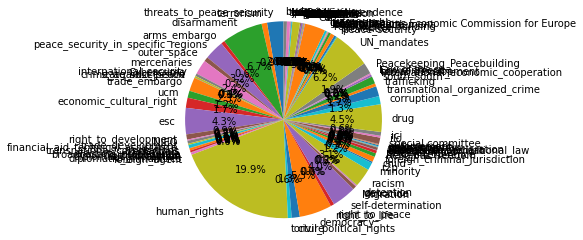

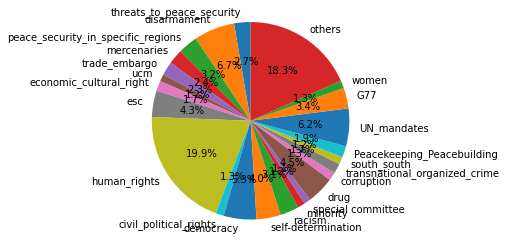

In [9]:
# THIS IS INCORRECT AS A DOCUMENT CAN HAVE SEVERAL TOPICS
list_topics = list(counter_topics.keys())

sizes = [v / sum(list(counter_topics.values())) for v in counter_topics.values()]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=list_topics, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

topics_filtered = [t for i,t in enumerate(list_topics) if sizes[i] > 0.01] + ["others"]
sizes_filtered = []
size_other = 0.
for size in sizes:
    if size > 0.01:
        sizes_filtered.append(size)
    else:
        size_other += size
sizes_filtered.append(size_other)

fig1, ax1 = plt.subplots()
ax1.pie(sizes_filtered, labels=topics_filtered, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

## Compute tf-idf 

In [17]:
# Retrieve the term frequency adjusted by document length
# tf(t,d) = ft / (number of words in d)

all_freq = []
all_words = []
ids_used = []

for keyword in keywords:

    for path_json in glob.glob("./{}/*.json".format(keyword)):
        
        print(path_json)
        
        metadata = json.load(open(path_json))
        ids = pathlib.Path(path_json).stem

        if len(metadata['topics']) and 'words_frequency' in metadata and \
                metadata['words_frequency'] and ids not in ids_used:
            
            N = 0.10
            freq, words = zip(*sorted(zip(
                        list(metadata['words_frequency'].values()),
                        list(metadata['words_frequency'].keys())
            )))
            N = min(max(int(N * len(words)), 50), 500)
            d = dict(zip(words[-N:], freq[-N:]))
            all_freq.append(d)
            all_words += words[-N:]

            ids_used.append(ids)

./non-intervention/N0426881.json
./non-intervention/N1534276.json
./non-intervention/NL670365.json
./non-intervention/N8831271.json
./non-intervention/G1521869.json
./non-intervention/G1014378.json
./non-intervention/N0958787.json
./non-intervention/N0265955.json
./non-intervention/G1523442.json
./non-intervention/N8717078.json
./non-intervention/N8522451.json
./non-intervention/V9857824.json
./non-intervention/V1051751.json
./non-intervention/G1911962.json
./non-intervention/NL306329.json
./non-intervention/NL311815.json
./non-intervention/N0359488.json
./non-intervention/N9157547.json
./non-intervention/N8724061.json
./non-intervention/N8563327.json
./non-intervention/N0863473.json
./non-intervention/G0310453.json
./non-intervention/N1612192.json
./non-intervention/N9438950.json
./non-intervention/N0163641.json
./non-intervention/N1733954.json
./non-intervention/N0723678.json
./non-intervention/N1444611.json
./non-intervention/N1255109.json
./non-intervention/NL530579.json
./non-inte

./non-intervention/N0070769.json
./non-intervention/N1506018.json
./non-intervention/S8771019.json
./non-intervention/N0075992.json
./non-intervention/V1911824.json
./non-intervention/N8912079.json
./non-intervention/N9369714.json
./non-intervention/G1115001.json
./non-intervention/N8458289.json
./non-intervention/G1729437.json
./non-intervention/N0548826.json
./non-intervention/N9708740.json
./non-intervention/N1800343.json
./non-intervention/N9586495.json
./non-intervention/N0346931.json
./non-intervention/NL312425.json
./non-intervention/N1607430.json
./non-intervention/N9976813.json
./non-intervention/G1806736.json
./non-intervention/N8632577.json
./non-intervention/G1511913.json
./non-intervention/N0441573.json
./non-intervention/N1919580.json
./non-intervention/N1059840.json
./non-intervention/G0512402.json
./non-intervention/N0863845.json
./non-intervention/N8963069.json
./non-intervention/NL322656.json
./non-intervention/N9003408.json
./non-intervention/N9986581.json
./non-inte

./non-intervention/N1155063.json
./non-intervention/N8632583.json
./non-intervention/G0544003.json
./non-intervention/N8625616.json
./non-intervention/N1712818.json
./non-intervention/N1605416.json
./non-intervention/N1642467.json
./non-intervention/N9686822.json
./non-intervention/N8625753.json
./non-intervention/N1459409.json
./non-intervention/G1319162.json
./non-intervention/V1252288.json
./non-intervention/NL323226.json
./non-intervention/NL307779.json
./non-intervention/N0544408.json
./non-intervention/NL670348.json
./non-intervention/N1461876.json
./non-intervention/V1903697.json
./non-intervention/G9564079.json
./non-intervention/V9983349.json
./non-intervention/N9370187.json
./non-intervention/N9986575.json
./non-intervention/G0213599.json
./non-intervention/N9133328.json
./non-intervention/N1459223.json
./non-intervention/N0754115.json
./non-intervention/G9562512.json
./non-intervention/G9512240.json
./non-intervention/N0458499.json
./non-intervention/N0947275.json
./non-inte

./non-intervention/N9386563.json
./non-intervention/V0188246.json
./non-intervention/N1904619.json
./non-intervention/G0516105.json
./non-intervention/N1156869.json
./non-intervention/V0983809.json
./non-intervention/G0113640.json
./non-intervention/N0632268.json
./non-intervention/N0235793.json
./non-intervention/NL306421.json
./non-intervention/N1612225.json
./non-intervention/NL307725.json
./non-intervention/N9386867.json
./non-intervention/N1607532.json
./non-intervention/N1140728.json
./non-intervention/N9131451.json
./non-intervention/G0062553.json
./non-intervention/N1746278.json
./non-intervention/N1619808.json
./non-intervention/G1921652.json
./non-intervention/NL302946.json
./non-intervention/N0759599.json
./non-intervention/N9728846.json
./non-intervention/N1730692.json
./non-intervention/N0264587.json
./non-intervention/N0867089.json
./non-intervention/N9382783.json
./non-intervention/N9161865.json
./non-intervention/N0556737.json
./non-intervention/N1838930.json
./non-inte

./non-intervention/N1451005.json
./non-intervention/G0313517.json
./non-intervention/NL680435.json
./non-intervention/NL306441.json
./non-intervention/V1901383.json
./non-intervention/N1738935.json
./non-intervention/G1609393.json
./non-intervention/NL316695.json
./non-intervention/N9686633.json
./non-intervention/N0853129.json
./non-intervention/N8513433.json
./non-intervention/N0028188.json
./non-intervention/N1156448.json
./non-intervention/N0638594.json
./non-intervention/N0132258.json
./non-intervention/NR055774.json
./non-intervention/NL306380.json
./non-intervention/N1524119.json
./non-intervention/N8809198.json
./non-intervention/N1258403.json
./non-intervention/N1332347.json
./non-intervention/N0147421.json
./non-intervention/NL316553.json
./non-intervention/N6608090.json
./non-intervention/N9912734.json
./non-intervention/N0354993.json
./non-intervention/V1900879.json
./non-intervention/NL307712.json
./non-intervention/V9990774.json
./non-intervention/N0957988.json
./non-inte

./non-intervention/N0246591.json
./non-intervention/N9531972.json
./non-intervention/N0962827.json
./non-intervention/N1248898.json
./non-intervention/G1605297.json
./non-intervention/N1535290.json
./non-intervention/N9582597.json
./non-intervention/V1807403.json
./non-intervention/NL323239.json
./non-intervention/N0253855.json
./non-intervention/NL307789.json
./non-intervention/N5705201.json
./non-intervention/N9408592.json
./non-intervention/G1112390.json
./non-intervention/N7858872.json
./non-intervention/N8534734.json
./non-intervention/N1351021.json
./non-intervention/N1146980.json
./non-intervention/N0645195.json
./non-intervention/N1021663.json
./non-intervention/N1345127.json
./non-intervention/N1830067.json
./non-intervention/N0649509.json
./non-intervention/N6719714.json
./non-intervention/V0050862.json
./non-intervention/N0631145.json
./non-intervention/N0754777.json
./non-intervention/N0259019.json
./non-intervention/N1729716.json
./non-intervention/N5704914.json
./non-inte

./non-intervention/V1912017.json
./non-intervention/G7962154.json
./non-intervention/N1327445.json
./non-intervention/N1605891.json
./non-intervention/N6341159.json
./non-intervention/N7528422.json
./non-intervention/N0269026.json
./non-intervention/N0563355.json
./non-intervention/N5734881.json
./non-intervention/G1928563.json
./non-intervention/NL311779.json
./non-intervention/N1731310.json
./non-intervention/N9381007.json
./non-intervention/G8241432.json
./non-intervention/N9576165.json
./non-intervention/N0753745.json
./non-intervention/N0654618.json
./non-intervention/NL147916.json
./non-intervention/N9833826.json
./non-intervention/G0010052.json
./non-intervention/N9722819.json
./non-intervention/G1819367.json
./non-intervention/NL300353.json
./non-intervention/NL315278.json
./non-intervention/N8927885.json
./non-intervention/N1344995.json
./non-intervention/N1156666.json
./non-intervention/N1520724.json
./non-intervention/N0845379.json
./non-intervention/N0268725.json
./non-inte

./non-intervention/N1835065.json
./non-intervention/N0665373.json
./non-intervention/V0189751.json
./non-intervention/N1905898.json
./non-intervention/N9115793.json
./non-intervention/N9405765.json
./non-intervention/N0562226.json
./non-intervention/NL316674.json
./non-intervention/N1731188.json
./non-intervention/N9021454.json
./non-intervention/V1701946.json
./non-intervention/N7757080.json
./non-intervention/NL306361.json
./non-intervention/NL309094.json
./non-intervention/V1601777.json
./non-intervention/G1261691.json
./non-intervention/N9686514.json
./non-intervention/N9686144.json
./non-intervention/N0033549.json
./non-intervention/N9631731.json
./non-intervention/NL306418.json
./non-intervention/N9437881.json
./non-intervention/G1708482.json
./non-intervention/G9618407.json
./non-intervention/N8632159.json
./non-intervention/N9334879.json
./non-intervention/N9486418.json
./non-intervention/N0046222.json
./non-intervention/G1929447.json
./non-intervention/N9387062.json
./non-inte

./non-intervention/V0388440.json
./non-intervention/N0859167.json
./non-intervention/NL316686.json
./non-intervention/V1183190.json
./non-intervention/N1051290.json
./non-intervention/N0658810.json
./non-intervention/N7123955.json
./non-intervention/V1052082.json
./non-intervention/N9622803.json
./non-intervention/N1145918.json
./non-intervention/N9828411.json
./non-intervention/N0146736.json
./non-intervention/G9810566.json
./non-intervention/N8925555.json
./non-intervention/N9586419.json
./non-intervention/N0554923.json
./non-intervention/NL316540.json
./non-intervention/N1055396.json
./non-intervention/G1010694.json
./non-intervention/G0713628.json
./non-intervention/NL324962.json
./non-intervention/N0559242.json
./non-intervention/N1429773.json
./non-intervention/N1934726.json
./non-intervention/V1601382.json
./non-intervention/N9718148.json
./non-intervention/N1258914.json
./non-intervention/N8915622.json
./non-intervention/N0458789.json
./non-intervention/NL306901.json
./non-inte

./non-intervention/G9385844.json
./non-intervention/N6529114.json
./non-intervention/N9481764.json
./non-intervention/N0122342.json
./non-intervention/N1600509.json
./non-intervention/N1705469.json
./non-intervention/N9729462.json
./non-intervention/N8719585.json
./non-intervention/N1938821.json
./non-intervention/N7627398.json
./non-intervention/N9877509.json
./non-intervention/N0024662.json
./non-intervention/N8933834.json
./non-intervention/N1844927.json
./non-intervention/N0854575.json
./non-intervention/NL300122.json
./non-intervention/V1384742.json
./non-intervention/N1633455.json
./non-intervention/N1610572.json
./non-intervention/N1929461.json
./non-intervention/N0038840.json
./non-intervention/N1470951.json
./non-intervention/V1508196.json
./non-intervention/N0658718.json
./non-intervention/G9385215.json
./non-intervention/N8615200.json
./non-intervention/N0529527.json
./non-intervention/N1424875.json
./non-intervention/NL321254.json
./non-intervention/N0921629.json
./non-inte

./non-interference/N1734842.json
./non-interference/G1014378.json
./non-interference/NL317754.json
./non-interference/G1523442.json
./non-interference/N9924355.json
./non-interference/N8717078.json
./non-interference/N1833045.json
./non-interference/N8522451.json
./non-interference/N0738126.json
./non-interference/N1712566.json
./non-interference/G1622656.json
./non-interference/G0902035.json
./non-interference/N1819154.json
./non-interference/V9988181.json
./non-interference/N0048366.json
./non-interference/N0851851.json
./non-interference/NL306329.json
./non-interference/N0359488.json
./non-interference/N9612760.json
./non-interference/N9157547.json
./non-interference/N7522705.json
./non-interference/N8724061.json
./non-interference/N1830110.json
./non-interference/N0752150.json
./non-interference/N0660343.json
./non-interference/N1620149.json
./non-interference/G0417112.json
./non-interference/NL323572.json
./non-interference/N9800354.json
./non-interference/NL322699.json
./non-inte

./non-interference/N8918252.json
./non-interference/NL323227.json
./non-interference/G1146245.json
./non-interference/N0746353.json
./non-interference/N1358072.json
./non-interference/N0561194.json
./non-interference/N0956865.json
./non-interference/NL321563.json
./non-interference/N0959339.json
./non-interference/N1260115.json
./non-interference/N0551871.json
./non-interference/N0661968.json
./non-interference/N0026810.json
./non-interference/N0628141.json
./non-interference/N0961350.json
./non-interference/G9551265.json
./non-interference/N1823710.json
./non-interference/NL339016.json
./non-interference/N9916571.json
./non-interference/N8863242.json
./non-interference/N1156249.json
./non-interference/N0962252.json
./non-interference/N9382068.json
./non-interference/N1732001.json
./non-interference/N1350550.json
./non-interference/N1829599.json
./non-interference/N1929614.json
./non-interference/N9815204.json
./non-interference/N8556784.json
./non-interference/N7004985.json
./non-inte

./non-interference/N9352782.json
./non-interference/G1806736.json
./non-interference/G9062785.json
./non-interference/N8632577.json
./non-interference/N9365808.json
./non-interference/N5206060.json
./non-interference/N1255538.json
./non-interference/N1057632.json
./non-interference/N1722559.json
./non-interference/N1919580.json
./non-interference/N9531999.json
./non-interference/G0816158.json
./non-interference/N1902636.json
./non-interference/G0911005.json
./non-interference/N7857629.json
./non-interference/N9686340.json
./non-interference/G0441302.json
./non-interference/G1827704.json
./non-interference/N9582356.json
./non-interference/N8963069.json
./non-interference/G9202876.json
./non-interference/N0461215.json
./non-interference/N1943286.json
./non-interference/N1804195.json
./non-interference/N9717270.json
./non-interference/N1737521.json
./non-interference/N0551191.json
./non-interference/N0123839.json
./non-interference/N9156726.json
./non-interference/N1143339.json
./non-inte

./non-interference/N1918345.json
./non-interference/N8556588.json
./non-interference/G0210680.json
./non-interference/N0022188.json
./non-interference/N9624219.json
./non-interference/N9348064.json
./non-interference/NL316298.json
./non-interference/N8456740.json
./non-interference/N0028090.json
./non-interference/N9161481.json
./non-interference/N9383025.json
./non-interference/N1843833.json
./non-interference/N9517469.json
./non-interference/N0858387.json
./non-interference/NL317036.json
./non-interference/N7859122.json
./non-interference/N8456828.json
./non-interference/G0440656.json
./non-interference/N9382819.json
./non-interference/N1350588.json
./non-interference/N0066917.json
./non-interference/N0057319.json
./non-interference/N8556619.json
./non-interference/N1935600.json
./non-interference/N0163932.json
./non-interference/G8369008.json
./non-interference/N9723893.json
./non-interference/N1354524.json
./non-interference/G8363956.json
./non-interference/G0924848.json
./non-inte

./non-interference/N1344857.json
./non-interference/N1737351.json
./non-interference/V0382218.json
./non-interference/G0515108.json
./non-interference/N8730222.json
./non-interference/N9586070.json
./non-interference/N1835542.json
./non-interference/N8630140.json
./non-interference/N0536776.json
./non-interference/NL332231.json
./non-interference/NL309862.json
./non-interference/N9105723.json
./non-interference/N8827424.json
./non-interference/N9686398.json
./non-interference/N0546233.json
./non-interference/N0666280.json
./non-interference/N0933548.json
./non-interference/G1707114.json
./non-interference/N9157100.json
./non-interference/N1150871.json
./non-interference/N0054352.json
./non-interference/G1715980.json
./non-interference/N1342297.json
./non-interference/N9883593.json
./non-interference/N1259613.json
./non-interference/N1719151.json
./non-interference/N1610911.json
./non-interference/V0982792.json
./non-interference/N1802563.json
./non-interference/N1646222.json
./non-inte

./non-interference/N0641402.json
./non-interference/N8057738.json
./non-interference/N1918712.json
./non-interference/V9991216.json
./non-interference/N8056980.json
./non-interference/N0061152.json
./non-interference/G0513385.json
./non-interference/N1828029.json
./non-interference/G9015041.json
./non-interference/N8627026.json
./non-interference/N1464595.json
./non-interference/N0640356.json
./non-interference/G0244465.json
./non-interference/N0328492.json
./non-interference/N8719216.json
./non-interference/NL338288.json
./non-interference/N1933854.json
./non-interference/N8456602.json
./non-interference/V1702282.json
./non-interference/G1810332.json
./non-interference/N0447177.json
./non-interference/N0330221.json
./non-interference/NL317748.json
./non-interference/N0066044.json
./non-interference/N1532214.json
./non-interference/N0758687.json
./non-interference/NL721014.json
./non-interference/N7858763.json
./non-interference/NL663105.json
./non-interference/G1417799.json
./non-inte

./non-interference/N0544177.json
./non-interference/N8917089.json
./non-interference/G9610487.json
./non-interference/N1624321.json
./non-interference/N8956086.json
./non-interference/N1031929.json
./non-interference/N9580160.json
./non-interference/N0529447.json
./non-interference/N1223770.json
./non-interference/N1837368.json
./non-interference/N1731492.json
./non-interference/N1248814.json
./non-interference/N1519373.json
./non-interference/G0502520.json
./non-interference/N1635619.json
./non-interference/N8157051.json
./non-interference/N1045412.json
./non-interference/N5702732.json
./non-interference/N0624559.json
./non-interference/N0451781.json
./non-interference/N1913943.json
./non-interference/N1258951.json
./non-interference/N0264196.json
./non-interference/G9310830.json
./non-interference/N1152774.json
./non-interference/N0161545.json
./non-interference/N1827503.json
./non-interference/N8956194.json
./non-interference/N1353252.json
./non-interference/N0630371.json
./non-inte

./non-interference/N8517221.json
./non-interference/N9924554.json
./non-interference/N9344574.json
./non-interference/G0041822.json
./non-interference/N6617037.json
./non-interference/N9885894.json
./non-interference/N8832319.json
./non-interference/N0074371.json
./non-interference/N1830592.json
./non-interference/N0133062.json
./non-interference/N9617949.json
./non-interference/N8526643.json
./non-interference/N7857634.json
./non-interference/N9716493.json
./non-interference/N0720602.json
./non-interference/N9447426.json
./non-interference/N9881838.json
./non-interference/N8626753.json
./non-interference/N9533956.json
./non-interference/N9511124.json
./non-interference/N0165317.json
./non-interference/G1618900.json
./non-interference/N7758750.json
./non-interference/G1906799.json
./non-interference/N0559416.json
./non-interference/G0842574.json
./non-interference/N7958135.json
./non-interference/N9608583.json
./non-interference/N8810454.json
./non-interference/G9214680.json
./non-inte

./non-interference/NL344487.json
./non-interference/N9450603.json
./non-interference/N1711044.json
./non-interference/N1221054.json
./non-interference/N9508889.json
./non-interference/N0530610.json
./non-interference/NL312422.json
./non-interference/V1908182.json
./non-interference/G1613090.json
./non-interference/N1256256.json
./non-interference/N1629565.json
./non-interference/G0513594.json
./non-interference/N0364514.json
./non-interference/N9356729.json
./non-interference/V1804739.json
./non-interference/G0102912.json
./non-interference/N1830208.json
./non-interference/NL306932.json
./non-interference/N8857079.json
./non-interference/G1829137.json
./non-interference/N0425320.json
./non-interference/N8756103.json
./non-interference/N1336723.json
./non-interference/N9708602.json
./non-interference/N0065215.json
./non-interference/N1942740.json
./non-interference/G0514744.json
./non-interference/N0556429.json
./non-interference/N1459415.json
./non-interference/N1350776.json
./non-inte

./non-interference/N1353909.json
./non-interference/N1362242.json
./non-interference/N8556558.json
./non-interference/N1930743.json
./non-interference/N9414118.json
./non-interference/G9419264.json
./non-interference/G1015234.json
./non-interference/N0742461.json
./non-interference/N1429581.json
./non-interference/N9629802.json
./non-interference/N8617152.json
./non-interference/NL750529.json
./non-interference/N0361200.json
./non-interference/N0352999.json
./non-interference/G9062781.json
./non-interference/N1631910.json
./non-interference/N8913400.json
./non-interference/N9382867.json
./non-interference/N1631013.json
./non-interference/G9414293.json
./non-interference/N0253855.json
./non-interference/N0430988.json
./non-interference/G1512287.json
./non-interference/N0942707.json
./non-interference/N1832236.json
./non-interference/N8556688.json
./non-interference/N9442502.json
./non-interference/N0533195.json
./non-interference/N9610016.json
./non-interference/V0782097.json
./non-inte

./non-interference/N1623433.json
./non-interference/N1159157.json
./non-interference/N1456311.json
./non-interference/G0211276.json
./non-interference/N1815558.json
./non-interference/N1501901.json
./non-interference/NL302895.json
./non-interference/G1512360.json
./non-interference/N1940226.json
./non-interference/N8960476.json
./non-interference/N9616475.json
./non-interference/N1352617.json
./non-interference/N1143331.json
./non-interference/N0762034.json
./non-interference/N8918190.json
./non-interference/N0657448.json
./non-interference/N1644735.json
./non-interference/G6955074.json
./non-interference/N1229191.json
./non-interference/N0053502.json
./non-interference/G9911654.json
./non-interference/NL388249.json
./non-interference/N0731905.json
./non-interference/N1061572.json
./non-interference/N1810074.json
./non-interference/N1624122.json
./non-interference/N1641921.json
./non-interference/N0323710.json
./non-interference/N9585531.json
./non-interference/N0026117.json
./non-inte

./non-interference/N9349684.json
./non-interference/V1805720.json
./non-interference/N9056877.json
./non-interference/N8527085.json
./non-interference/G8712048.json
./non-interference/N1931466.json
./non-interference/N1833369.json
./non-interference/N1056786.json
./non-interference/G0842235.json
./non-interference/N1231426.json
./non-interference/G1604018.json
./non-interference/N8957456.json
./non-interference/N1154820.json
./non-interference/NR045388.json
./non-interference/N8756025.json
./non-interference/NL700212.json
./non-interference/N9442562.json
./non-interference/N1921348.json
./non-interference/N1146260.json
./non-interference/N0444650.json
./non-interference/N9826058.json
./non-interference/N1601979.json
./non-interference/N0852055.json
./non-interference/N0856850.json
./non-interference/N9820860.json
./non-interference/N1070175.json
./non-interference/N1129278.json
./non-interference/G9718285.json
./non-interference/N1736084.json
./non-interference/N0360471.json
./non-inte

./non-interference/N9885707.json
./non-interference/G9941620.json
./non-interference/N0543664.json
./non-interference/G0115774.json
./non-interference/N8904389.json
./non-interference/N1838362.json
./non-interference/N8619395.json
./non-interference/N1349261.json
./non-interference/V1707261.json
./non-interference/N1244731.json
./non-interference/N1528381.json
./non-interference/N1163047.json
./non-interference/N1151136.json
./non-interference/N1451590.json
./non-interference/N8900260.json
./non-interference/NL357071.json
./non-interference/N1361658.json
./non-interference/N9631707.json
./non-interference/G8360132.json
./non-interference/NL350537.json
./non-interference/N1731151.json
./non-interference/NL317815.json
./non-interference/N0455651.json
./non-interference/N8155813.json
./non-interference/NL461514.json
./non-interference/G0112398.json
./non-interference/N9900048.json
./non-interference/N9582308.json
./non-interference/V0652310.json
./non-interference/N1064244.json
./non-inte

./non-interference/N8920320.json
./non-interference/N1936911.json
./non-interference/N9677491.json
./non-interference/N0648837.json
./non-interference/N0853664.json
./non-interference/N0147803.json
./non-interference/N1914026.json
./non-interference/N1912058.json
./non-interference/V1180148.json
./non-interference/N9610406.json
./non-interference/G0761025.json
./non-interference/N9027386.json
./non-interference/NL306422.json
./non-interference/N0938690.json
./non-interference/G0701455.json
./non-interference/N0525289.json
./non-interference/N0665092.json
./non-interference/N0027612.json
./non-interference/N7512260.json
./non-interference/G1727935.json
./non-interference/N8531087.json
./non-interference/N9986022.json
./non-interference/G9410448.json
./non-interference/N8523956.json
./non-interference/NL840065.json
./non-interference/N9986167.json
./non-interference/G9062119.json
./non-interference/V9720071.json
./non-interference/G1411917.json
./non-interference/N9481641.json
./non-inte

./non-interference/N8557787.json
./non-interference/NL147947.json
./non-interference/N8725275.json
./non-interference/N1508120.json
./non-interference/N9540840.json
./non-interference/NL301143.json
./non-interference/N1725093.json
./non-interference/N8763045.json
./non-interference/N9686620.json
./non-interference/N1051290.json
./non-interference/N0658810.json
./non-interference/N1630720.json
./non-interference/N1145918.json
./non-interference/G1519855.json
./non-interference/N1152674.json
./non-interference/N8956997.json
./non-interference/N8925555.json
./non-interference/N9586419.json
./non-interference/N8621338.json
./non-interference/N0554923.json
./non-interference/N1055396.json
./non-interference/N1823155.json
./non-interference/N1225659.json
./non-interference/N1623419.json
./non-interference/NL320188.json
./non-interference/N0559242.json
./non-interference/G9412320.json
./non-interference/N0965106.json
./non-interference/N1124733.json
./non-interference/N9343774.json
./non-inte

./non-interference/N9386623.json
./non-interference/N0548760.json
./non-interference/N1153213.json
./non-interference/G1600504.json
./non-interference/N1151384.json
./non-interference/N0023688.json
./non-interference/N8457105.json
./non-interference/N9420139.json
./non-interference/N1043034.json
./non-interference/N1265231.json
./non-interference/NL303867.json
./non-interference/G7806242.json
./non-interference/N0360495.json
./non-interference/N8563057.json
./non-interference/N9419491.json
./non-interference/G9310896.json
./non-interference/N9381666.json
./non-interference/G1601495.json
./non-interference/N1838650.json
./non-interference/N9482671.json
./non-interference/N1601972.json
./non-interference/G0740753.json
./non-interference/N1729395.json
./non-interference/N0457974.json
./non-interference/N8823350.json
./non-interference/N1925300.json
./non-interference/G9212730.json
./non-interference/N0228920.json
./non-interference/N6422616.json
./non-interference/N1354024.json
./non-inte

./non-interference/NL305475.json
./non-interference/N1251651.json
./non-interference/N0542897.json
./non-interference/N0262749.json
./non-interference/N9115994.json
./non-interference/N1936956.json
./non-interference/N8756557.json
./non-interference/N1745488.json
./non-interference/NL148851.json
./non-interference/NL312426.json
./non-interference/G0344811.json
./non-interference/N9985992.json
./non-interference/N1020219.json
./non-interference/G9553168.json
./non-interference/NL909518.json
./non-interference/N0365301.json
./non-interference/N9446815.json
./non-interference/N9381535.json
./non-interference/N8625862.json
./non-interference/N1341030.json
./non-interference/N1456064.json
./non-interference/N1354727.json
./non-interference/N8056950.json
./non-interference/N1635692.json
./non-interference/NL310661.json
./non-interference/N8863308.json
./non-interference/N1831237.json
./non-interference/G1051194.json
./non-interference/G1011620.json
./non-interference/N1061596.json
./non-inte

./non-interference/N9882343.json
./non-interference/N9912527.json
./non-interference/N0952425.json
./non-interference/N9382753.json
./non-interference/G0240546.json
./non-interference/N9581975.json
./non-interference/N1429573.json
./non-interference/N0548653.json
./non-interference/N9387044.json
./non-interference/N1540227.json
./non-interference/N7015006.json
./non-interference/N0957762.json
./non-interference/N1831387.json
./non-interference/NL344476.json
./non-interference/N0754402.json
./non-interference/NL305183.json
./non-interference/N1060667.json
./non-interference/N0528414.json
./non-interference/N9526316.json
./non-interference/N0252170.json
./non-interference/N1930031.json
./non-interference/NL300544.json
./non-interference/N9882093.json
./non-interference/N9828484.json
./non-interference/N1830703.json
./non-interference/G1246643.json
./non-interference/N0073625.json
./non-interference/N1843387.json
./non-interference/G1616633.json
./non-interference/N1026338.json
./non-inte

./interfere in the internal affairs/NL511530.json
./interfere in the internal affairs/N9035873.json
./interfere in the internal affairs/N1933034.json
./interfere in the internal affairs/N9585309.json
./interfere in the internal affairs/G9510143.json
./interfere in the internal affairs/N9382879.json
./interfere in the internal affairs/N0746353.json
./interfere in the internal affairs/G9260616.json
./interfere in the internal affairs/N8456262.json
./interfere in the internal affairs/N1732001.json
./interfere in the internal affairs/G9610842.json
./interfere in the internal affairs/G9160497.json
./interfere in the internal affairs/N0165994.json
./interfere in the internal affairs/N9811617.json
./interfere in the internal affairs/NL303916.json
./interfere in the internal affairs/N1357016.json
./interfere in the internal affairs/N1843824.json
./interfere in the internal affairs/G1247421.json
./interfere in the internal affairs/N9057445.json
./interfere in the internal affairs/N1812344.json


./interfere in the internal affairs/N1140728.json
./interfere in the internal affairs/N1745004.json
./interfere in the internal affairs/G1218986.json
./interfere in the internal affairs/N8556595.json
./interfere in the internal affairs/NL322735.json
./interfere in the internal affairs/G0970160.json
./interfere in the internal affairs/N0071373.json
./interfere in the internal affairs/N1605939.json
./interfere in the internal affairs/N9908841.json
./interfere in the internal affairs/G9414136.json
./interfere in the internal affairs/N0751238.json
./interfere in the internal affairs/N8957414.json
./interfere in the internal affairs/N1614847.json
./interfere in the internal affairs/NL311852.json
./interfere in the internal affairs/N9686327.json
./interfere in the internal affairs/N1152774.json
./interfere in the internal affairs/N0163714.json
./interfere in the internal affairs/G1917849.json
./interfere in the internal affairs/N8863086.json
./interfere in the internal affairs/N1920999.json


./interfere in the internal affairs/N1132875.json
./interfere in the internal affairs/N0551622.json
./interfere in the internal affairs/N1742812.json
./interfere in the internal affairs/N9686365.json
./interfere in the internal affairs/NL305015.json
./interfere in the internal affairs/G9914494.json
./interfere in the internal affairs/N9786050.json
./interfere in the internal affairs/N9482729.json
./interfere in the internal affairs/N8155829.json
./interfere in the internal affairs/N0039261.json
./interfere in the internal affairs/N0220459.json
./interfere in the internal affairs/N7858783.json
./interfere in the internal affairs/NL300981.json
./interfere in the internal affairs/N1911750.json
./interfere in the internal affairs/G9160484.json
./interfere in the internal affairs/N1718046.json
./interfere in the internal affairs/N1538051.json
./interfere in the internal affairs/N1513244.json
./interfere in the internal affairs/N1712298.json
./interfere in the internal affairs/N9886185.json


./interfere in the internal affairs/G9311711.json
./interfere in the internal affairs/N0757058.json
./interfere in the internal affairs/N0759768.json
./interfere in the internal affairs/N0660788.json
./interfere in the internal affairs/N1734836.json
./interfere in the internal affairs/N9785011.json
./interfere in the internal affairs/NL309460.json
./interfere in the internal affairs/N7125707.json
./interfere in the internal affairs/N8626106.json
./interfere in the internal affairs/N0258639.json
./interfere in the internal affairs/N1928180.json
./interfere in the internal affairs/G9417973.json
./interfere in the internal affairs/N0033543.json
./interfere in the internal affairs/NL300483.json
./interfere in the internal affairs/G1263649.json
./interfere in the internal affairs/NL305052.json
./interfere in the internal affairs/N9885412.json
./interfere in the internal affairs/N8157146.json
./interfere in the internal affairs/N9343276.json
./interfere in the internal affairs/N1934526.json


./intervene in the internal affairs/G9313790.json
./intervene in the internal affairs/G1310467.json
./intervene in the internal affairs/N9444210.json
./intervene in the internal affairs/N8810634.json
./intervene in the internal affairs/NL302926.json
./intervene in the internal affairs/N0557376 7.29.46 PM.json
./intervene in the internal affairs/N9883593 7.29.46 PM.json
./intervene in the internal affairs/N9985902.json
./intervene in the internal affairs/N1933854 7.29.46 PM.json
./intervene in the internal affairs/NL312766.json
./intervene in the internal affairs/N1908093.json
./intervene in the internal affairs/N6728566 7.29.46 PM.json
./intervene in the internal affairs/NL304004 7.29.46 PM.json
./intervene in the internal affairs/NL318082.json
./intervene in the internal affairs/NL630699.json
./intervene in the internal affairs/G1913594.json
./intervene in the internal affairs/N1457023.json
./intervene in the internal affairs/N1460700.json
./intervene in the internal affairs/N0627260 

In [18]:
all_words = list(set(all_words))
number_words = len(all_words)
number_docs = len(ids_used)

print("Number of different words: {}".format(number_words))
print("Number of documents: {}".format(number_docs))

Number of different words: 13927
Number of documents: 2799


In [19]:
# Put all the tf to vectors of same size (= number_words)
tf = numpy.zeros((number_docs, number_words))

for i, word in enumerate(all_words):
    for j, freq in enumerate(all_freq):
        if word in freq:
            tf[j, i] = freq[word]

# Compute the Inverse Document Frequency (Warning: slow!)
idf = numpy.full(number_words, 1)

for i, word in enumerate(all_words):

    if not(i%1000):
        print(i, ' / ', number_words)

    for f in all_freq:
        if word in f:
            idf[i] += 1

idf = numpy.log(number_docs / idf)

# Compute the tf-idf
tfidf = tf * idf

# Print the idf of the most and least common words
sorted_idf, sorted_words = zip(*sorted(zip(idf, all_words)))
print(sorted_words[:200])
print()
print(sorted_words[-200:])

0  /  13927
1000  /  13927
2000  /  13927
3000  /  13927
4000  /  13927
5000  /  13927
6000  /  13927
7000  /  13927
8000  /  13927
9000  /  13927
10000  /  13927
11000  /  13927
12000  /  13927
13000  /  13927
('united', 'international', ')', '(', 'nations', 'states', 'general', ':', 'resolution', 'including', 'report', 'national', 'rights', 'security', 'development', 'law', 'human', 'cooperation', 'well', 'political', 'assembly', 'state', 'measures', 'economic', 'countries', 'order', 'social', 'principles', 'session', 'council', 'particular', 'implementation', 'support', 'special', 'within', 'efforts', 'new', 'right', 'work', 'government', 'respect', 'information', 'peace', 'world', 'committee', 'one', 'may', 'activities', 'take', 'commission', 'relevant', 'republic', 'convention', 'group', 'system', 'people', 'secretarygeneral', 'protection', 'regard', 'ensure', 'regional', 'action', 'country', 'organizations', 'legal', 'accordance', 'upon', 'assistance', 'view', 'parties', 'situati

In [20]:
print(tfidf.shape)

(2799, 13927)
